Did I need to do this?

In [3]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [8]:
import json

with open("/Users/Honors/Desktop/signpost-tags/data/final_texts.json", "r") as f1:
    with open("/Users/Honors/Desktop/signpost-tags/data/signpost_corpus.txt", "w") as f2:
        f2.write("\n\n".join(["\n".join(block['text']) for block in json.loads(f1.read())]))

In [15]:
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import io

corpus = PlaintextCorpusReader('/Users/Honors/Desktop/signpost-tags/data/', '.*')

# NLP on The Wikipedia Signpost, Part 1

In [16]:
with open("/Users/Honors/Desktop/signpost-tags/data/signpost_corpus.txt", "r") as f:
    signpost = nltk.Text(nltk.word_tokenize(f.read()))

Find context around words:

In [19]:
signpost.concordance("WMF")

Displaying 25 of 2948 matches:
 an incredible resource that can help WMF and my feeling is that their raw ener
can always be better utilized . While WMF has some financial resources for a mi
ividuals and other entities donate to WMF because they believe in Wikipedia and
een a plus . What is incredible about WMF is that we can all communicate with e
eeds of the many communities that the WMF serves . What do you think of the Wik
n , what would you change ? Generally WMF has been extremely successful in fulf
ventually it might be a good idea for WMF to have a permanent home ( and not ju
 place . I think it 's very important WMF evolves its linguistic policy so that
ns . So IMHO the current main task of WMF towards equality of communities is ( 
ions of the staff and the community . WMF must be who will support innovative i
e community . Without our community , WMF would be called Numedia Foundation : 
e reasons for my resignation from the WMF office team . I plan on remaining an 
een , eve

Men versus women in the *Signpost*.

In [23]:
import re
signpost.findall(r"<a> (<.*>) <man>")

disabled; disabled; disabled; ); ); ); Jewish; single; dead; young;
young; young; young; bad; sleeping; complicated; religious;
Vietnamese; young; young; masked; ``; single; polished; young; young;
fascinating; young; military; wealthy; poor; dead; thirty-year-old;
naked; wealthy; ]; black; white


In [24]:
signpost.findall(r"<a> (<.*>) <woman>")

Korean; battered; business; pig-faced; young; Maasai; striking;
modern; married; Puritan; prominent; trans; good; Cherokee; multi-
talented; black; naked; young; young; naked; young; humanoid;
Pakistani; young; pregnant; half-naked; young; young; young; trans;
trans; trans; transgender; peasant; trans; half-naked; young; near-
naked; remarkable; near-nude; Sudanese; captive; white


So a lot of the work done in NLP comes down to "find the right regex for the thing".

In [28]:
signpost.findall(r"<a> (<.*>) <administrator>")

real; WP; Wikipedia; network; semi-active; Wikipedia; trusted; fifth;
Wikipedia; Wikipedia; human; former; fellow; Wikinews; Wikipedia;
system; system; dire; former; former; single; 13-year-old; new; new;
new; new; sports; new; wiki; system; new; volunteer; system; site;
volunteer; Swiss; Wikipedia; local; Wikipedia; veteran; Wikipedia;
Wikipedia; Wikipedia; Wikipedia; distinguished; Wikipedia; Wikipedia;
Wikipedia; Wikipedia; trusted; Wikipedia; Wikipedia; Wikipedia;
volunteer; volunteer


In [35]:
signpost.findall(r"<a> (<.*>) <Wikipedia>")

``; Norwegian; Nynorsk; Bokmål-only; third; ``; popular; forthcoming;
free; good; test; new; Cantonese; walking; Swiss; spoken; big;
Japanese; modified; vandalized; new; certain; German; random;
particular; given; vandalised; page; curious; Model; typical; typical;
worthwhile; ``; b; given; given; poor; Neuroscience; recent;
celebrity’s; perception; frequent; full; single; judge; Kiswahili;
Kiswahili; local; ``; helpful; casual; new; special; new; ``; typical;
popular; Persian; frequent; ``; ``; ``; single; ``; ``; ``; possible;
fundamental; long-term; longtime; given; diversity-minded; ``;
simulated; new; new; single; Hindi; specific; ``; simple;
corresponding; young; 28-page; self-professed; frequent; related;
casual; given; given; regular; good; Culinary; new; particular; whole;
native; small; better; small; given; subject—then; brand’s; big; two-
page; Dyslexic-friendly; Wikipediocracy; printed; high; permanent;
Persian; substantial; professional; loyal; free; ``; larger; new; ``;


In [33]:
with open("/Users/Honors/Desktop/signpost-tags/data/signpost_corpus.txt", "r") as f:
    signpost_sentences = nltk.sent_tokenize(f.read())

In [34]:
signpost_sentences[10:100]

['Advocate KeithTyler responded that he thought this might exceed the role and function of the association.',
 "It appears that further discussion of these issues will have to wait for the AMA's meeting, but it is not yet certain when that will be held.",
 'This will be a regular column dealing with cases before the Arbitration Committee and other matters going through the dispute resolution system.',
 'Hopefully, it will not get too long to write.',
 '(Yes, the acronym is intentional, with tongue planted firmly in cheek.)',
 'New Arbitrators finish off more cases\nThe recently elected crew of new Arbitrators continued to make progress toward reaching decisions on their existing cases.',
 'Within a couple of days of beginning their terms, they had already closed a couple of obviously stale cases, and concluded a one-year ban on Lir.',
 'Last week, the Arbitration Committee closed two additional cases, prohibiting original research and edit warring over the Phil Gingrey article, and ban

This uses part of speech tagging to find words which appear in similar places ($A W B$ versus $A W' B$).

In [36]:
signpost.similar("Wikipedia")

the it and a this that articles which in them new its all wikimedia to
their what other one our


In [37]:
signpost.similar("administrator")

article editor and admin editors the articles wikipedia image
administrators account issue user in page project example encyclopedia
editing content


You can part-of-speech tokenize inputted text:

In [39]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Honors/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [44]:
[nltk.pos_tag(nltk.word_tokenize(s)) for s in signpost_sentences[:10]]

[[('The', 'DT'),
  ('Association', 'NNP'),
  ('of', 'IN'),
  ('Members', 'NNP'),
  ("'", 'POS'),
  ('Advocates', 'NNS'),
  (',', ','),
  ('an', 'DT'),
  ('independent', 'JJ'),
  ('association', 'NN'),
  ('involved', 'VBN'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('dispute', 'NN'),
  ('resolution', 'NN'),
  ('process', 'NN'),
  (',', ','),
  ('has', 'VBZ'),
  ('started', 'VBN'),
  ('discussions', 'NNS'),
  ('on', 'IN'),
  ('having', 'VBG'),
  ('a', 'DT'),
  ('new', 'JJ'),
  ('election', 'NN'),
  ('for', 'IN'),
  ('the', 'DT'),
  ('position', 'NN'),
  ('of', 'IN'),
  ('AMA', 'NNP'),
  ('Coordinator', 'NNP'),
  ('.', '.')],
 [('Since', 'IN'),
  ('the', 'DT'),
  ('initial', 'JJ'),
  ('election', 'NN'),
  ('of', 'IN'),
  ('Alex756', 'NNP'),
  ('to', 'TO'),
  ('this', 'DT'),
  ('position', 'NN'),
  ('last', 'JJ'),
  ('April', 'NNP'),
  ('was', 'VBD'),
  ('for', 'IN'),
  ('a', 'DT'),
  ('term', 'NN'),
  ('of', 'IN'),
  ('six', 'CD'),
  ('months', 'NNS'),
  (',', ','),
  ('it', 'PRP'),
  ('appears

In [68]:
import numpy as np

In [69]:
%time tag_fd = nltk.FreqDist(tag for (word, tag) in np.array([nltk.pos_tag(nltk.word_tokenize(s)) for s in signpost_sentences[:10]]).flatten()[0])

CPU times: user 28.8 ms, sys: 2.71 ms, total: 31.5 ms
Wall time: 29.6 ms


In [70]:
%time tag_fd = nltk.FreqDist(tag for (word, tag) in np.array([nltk.pos_tag(nltk.word_tokenize(s)) for s in signpost_sentences[:100]]).flatten()[0])

CPU times: user 275 ms, sys: 25.4 ms, total: 300 ms
Wall time: 299 ms


In [71]:
%time tag_fd = nltk.FreqDist(tag for (word, tag) in np.array([nltk.pos_tag(nltk.word_tokenize(s)) for s in signpost_sentences[:1000]]).flatten()[0])

CPU times: user 2.63 s, sys: 62.5 ms, total: 2.69 s
Wall time: 2.71 s


In [72]:
len(signpost_sentences)

172472

In [74]:
(172*2.71)/60

7.768666666666666

In [79]:
tag_fd.most_common()

[('NN', 6),
 ('IN', 5),
 ('DT', 5),
 ('NNP', 4),
 ('JJ', 2),
 (',', 2),
 ('NNS', 2),
 ('VBN', 2),
 ('.', 1),
 ('VBG', 1),
 ('POS', 1),
 ('VBZ', 1)]

In [62]:
tag_fd.freq('NN')

0.1875

In [63]:
tag_fd.get('NN')

6

In [64]:
tag_fd.max()

'NN'

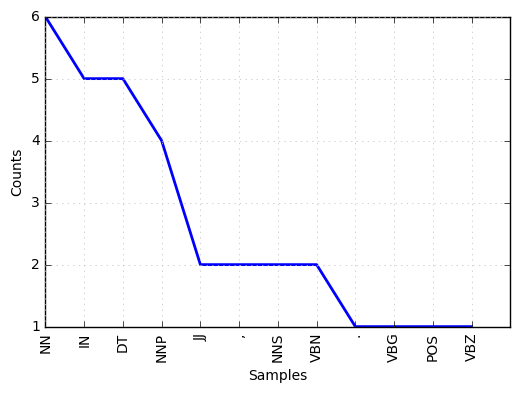

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
tag_fd.plot()